In [1]:
import chardet
import pandas as pd
import urllib.request

    
#print(encoding_result)
data = pd.read_csv('../../news/scraping_result/en/2019_down3/2019_down3_Coindesk.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../news/scraping_result/en/2019_down3/2019_down3_Cointelegraph.csv',error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/en/2019_down3/2019_down3_CryptoNews.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/en/2019_down3/2019_down3_Forbes.csv', error_bad_lines=False))


In [2]:
text = data[['main article']]
print(text)



                                         main article
0   Over the course of 30 minutes, beginning at 16...
1   The top cryptocurrency had been largely tradin...
2   The leading cryptocurrency’s stellar rally fro...
3   Fold product lead Will Reeves told CoinDesk th...
4   Trading began today on Boerse Stuttgart Digita...
..                                                ...
17  Genetics aren’t destiny, the Senate Aging Comm...
18  Intermountain is using blockchain-based techno...
19  Over the last few decades, banking executives ...
20  Brendan Doherty: Great to meet you Helene! I k...
21  Imagine if Anime Expo were in VR—and specifica...

[110 rows x 1 columns]


In [3]:
text['main article'] = text['main article'].astype(str)
text['main article'] = text.apply(lambda row: row['main article'].replace("/"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("*"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("…"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\\"," "), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [4]:
import nltk
text['main article'] = text.apply(lambda row: nltk.word_tokenize(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
# 소문자 적용 , - 문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word.lower().replace("-","") for word in x])
# 공백문자 삭제
text['main article'] = text['main article'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [6]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['main article']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# 불용어 품사 제거
text['main article'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
import csv
stopword_list =[]
f = open('../../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [10]:
import re
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['main article'] = text['main article'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
native_number_pattern=re.compile(r'[0-9]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['main article'] = text['main article'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
from nltk.stem import WordNetLemmatizer
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['main article'] = text['main article'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사
#print(text)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [15]:
tokenized_doc = text['main article'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [16]:
article_contents = tokenized_doc.values.tolist()

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [18]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [19]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [20]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [21]:
word2id = defaultdict(lambda: 0)

In [22]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [23]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [24]:
len(tf_idf_result)

4675

In [25]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

4675


In [26]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [27]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.002*"orange" + 0.002*"assemble" + 0.002*"horticulture" + 0.002*"polecsak" + 0.002*"biopharma" + 0.002*"construct" + 0.002*"fossil" + 0.002*"dinosaur"')
(1, '0.002*"bolster" + 0.002*"getaway" + 0.002*"female" + 0.002*"tank" + 0.002*"assurance" + 0.002*"estonian" + 0.002*"continuously" + 0.002*"gauge"')
(2, '0.001*"combustion" + 0.001*"worstcase" + 0.001*"selfdriving" + 0.001*"fathom" + 0.001*"driverless" + 0.001*"michigan" + 0.001*"accustom" + 0.001*"motor"')
(3, '0.000*"vary" + 0.000*"drain" + 0.000*"tariff" + 0.000*"turbulence" + 0.000*"brexit" + 0.000*"union" + 0.000*"slap" + 0.000*"http"')


In [28]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [29]:
sentences = article_contents

In [30]:
from gensim.models import Word2Vec

In [31]:
model = Word2Vec(sentences, min_count=1)

In [32]:
len(model.wv.vocab)

4675

In [33]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [34]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [35]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [36]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [37]:
temp_cluster_result['cluster'] = assigned_clusters

In [38]:
temp_cluster_result['raw_data'] = X.tolist()

In [39]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [40]:
from sklearn.metrics import pairwise_distances

In [41]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [42]:
len(cosine_centroid_list)

4675

In [43]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [44]:
sum(temp_distance[3])

2073.7096497575535

In [45]:
import scipy.spatial.distance as dist

In [46]:
dist.cosine(X[0],cosine_centroid_list[0])

0.028728140503884614

In [47]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.0527927007326676

In [48]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [49]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [50]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 부정적

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
569,"[-0.000757930101826787, 0.007797480095177889, ...",procedure,0,"[0.00014774402, 0.0011896995, 4.0959305e-05, -...",0.323356,0.003018,1.320338,NaN
2491,"[0.003493114374577999, 0.00014943158021196723,...",overbought,0,"[0.00014774402, 0.0011896995, 4.0959305e-05, -...",0.388600,0.002012,1.386588,NaN
915,"[-0.0024609791580587626, 0.0037379595451056957...",lock,0,"[0.00014774402, 0.0011896995, 4.0959305e-05, -...",0.390959,0.003018,1.387941,NaN
2810,"[-0.0020113668870180845, 0.002974512055516243,...",keary,0,"[0.00014774402, 0.0011896995, 4.0959305e-05, -...",0.418092,0.003018,1.415073,NaN
1785,"[0.0005568079650402069, 0.004758080001920462, ...",spokesman,0,"[0.00014774402, 0.0011896995, 4.0959305e-05, -...",0.423915,0.002012,1.421903,NaN
1957,"[0.0049942792393267155, -0.0015478923451155424...",troll,0,"[0.00014774402, 0.0011896995, 4.0959305e-05, -...",0.437419,0.002012,1.435407,NaN
3675,"[-0.0003565553342923522, 0.003047199686989188,...",cryptofever,0,"[0.00014774402, 0.0011896995, 4.0959305e-05, -...",0.437524,0.001006,1.436518,NaN
4655,"[0.0011055436916649342, 0.0022081034258008003,...",kowloon,0,"[0.00014774402, 0.0011896995, 4.0959305e-05, -...",0.438571,0.002012,1.436559,NaN
2613,"[-0.002781208138912916, 0.00012335370411165059...",punish,0,"[0.00014774402, 0.0011896995, 4.0959305e-05, -...",0.440630,0.002012,1.438618,NaN
3464,"[0.0034680787939578295, 0.0028249211609363556,...",starter,0,"[0.00014774402, 0.0011896995, 4.0959305e-05, -...",0.444124,0.002012,1.442112,NaN


In [51]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2142,"[-0.0005707128439098597, 0.0017827728297561407...",embrace,1,"[0.00024539736, 0.0018847332, -0.00035157386, ...",0.268754,0.003018,1.265736,NaN
2564,"[0.0035015183966606855, 0.00775483250617981, 7...",recordbreaking,1,"[0.00024539736, 0.0018847332, -0.00035157386, ...",0.324040,0.002012,1.322028,NaN
2151,"[-0.002330249408259988, 0.0009168954566121101,...",necessary,1,"[0.00024539736, 0.0018847332, -0.00035157386, ...",0.333960,0.003018,1.330942,NaN
4062,"[0.0036522704176604748, 0.006832486018538475, ...",fargo,1,"[0.00024539736, 0.0018847332, -0.00035157386, ...",0.350641,0.005030,1.345610,NaN
467,"[0.00235843937844038, 0.0036665135994553566, 0...",criticism,1,"[0.00024539736, 0.0018847332, -0.00035157386, ...",0.351619,0.002012,1.349607,NaN
1235,"[0.0025410628877580166, 0.004732321482151747, ...",assessment,1,"[0.00024539736, 0.0018847332, -0.00035157386, ...",0.357305,0.003018,1.354287,NaN
3054,"[0.0010455700103193521, 0.0007351869717240334,...",upgrade,1,"[0.00024539736, 0.0018847332, -0.00035157386, ...",0.358278,0.002012,1.356266,NaN
1122,"[0.004373614210635424, 0.006337604485452175, -...",manner,1,"[0.00024539736, 0.0018847332, -0.00035157386, ...",0.367258,0.004024,1.363234,NaN
2395,"[0.0020075873471796513, 0.004644497763365507, ...",technique,1,"[0.00024539736, 0.0018847332, -0.00035157386, ...",0.378254,0.002012,1.376242,NaN
2160,"[0.0067937918938696384, 0.003867238061502576, ...",historical,1,"[0.00024539736, 0.0018847332, -0.00035157386, ...",0.382771,0.002012,1.380759,NaN


In [52]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
636,"[0.004259108100086451, 0.002033563330769539, 0...",guarantee,2,"[0.0016350743, 0.00064624, -6.7906025e-05, -7....",0.224403,0.005030,1.219373,NaN
2347,"[0.006687085144221783, 0.004692884162068367, -...",daimler,2,"[0.0016350743, 0.00064624, -6.7906025e-05, -7....",0.317878,0.003018,1.314860,NaN
1468,"[-0.0006726784631609917, 0.005573727190494537,...",physical,2,"[0.0016350743, 0.00064624, -6.7906025e-05, -7....",0.324228,0.004024,1.320204,NaN
974,"[-0.0006207632250152528, 0.0024063775781542063...",dismiss,2,"[0.0016350743, 0.00064624, -6.7906025e-05, -7....",0.342783,0.003018,1.339764,NaN
504,"[0.002306323731318116, 0.0036402412224560976, ...",manipulative,2,"[0.0016350743, 0.00064624, -6.7906025e-05, -7....",0.349389,0.004024,1.345365,NaN
2004,"[0.004980496130883694, 3.824192390311509e-06, ...",agent,2,"[0.0016350743, 0.00064624, -6.7906025e-05, -7....",0.364848,0.002012,1.362835,NaN
2346,"[0.007110187783837318, 0.0036899440456181765, ...",conditional,2,"[0.0016350743, 0.00064624, -6.7906025e-05, -7....",0.367875,0.002012,1.365863,NaN
2966,"[0.0027661374770104885, 0.0037302435375750065,...",gpus,2,"[0.0016350743, 0.00064624, -6.7906025e-05, -7....",0.376456,0.002012,1.374444,NaN
2959,"[0.00034783949377015233, 0.006279417313635349,...",field,2,"[0.0016350743, 0.00064624, -6.7906025e-05, -7....",0.381732,0.003018,1.378713,NaN
2601,"[0.006037303712219, -0.001058048103004694, -0....",arbitrary,2,"[0.0016350743, 0.00064624, -6.7906025e-05, -7....",0.390314,0.002012,1.388302,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
110,"[0.08206712454557419, 0.10910401493310928, -0....",bitcoin,3,"[0.0067051207, 0.008223721, -0.0021994845, -0....",0.000802,0.273644,0.727158,NaN
87,"[0.08190575987100601, 0.10665298998355865, -0....",trade,3,"[0.0067051207, 0.008223721, -0.0021994845, -0....",0.000780,0.226360,0.774421,NaN
10,"[0.09235642850399017, 0.11585712432861328, -0....",market,3,"[0.0067051207, 0.008223721, -0.0021994845, -0....",0.000680,0.210263,0.790417,NaN
398,"[0.07216811180114746, 0.0896698459982872, -0.0...",blockchain,3,"[0.0067051207, 0.008223721, -0.0021994845, -0....",0.001017,0.187124,0.813893,NaN
42,"[0.0670669749379158, 0.08705204725265503, -0.0...",crypto,3,"[0.0067051207, 0.008223721, -0.0021994845, -0....",0.001157,0.180082,0.821075,NaN
304,"[0.07587948441505432, 0.09700318425893784, -0....",company,3,"[0.0067051207, 0.008223721, -0.0021994845, -0....",0.000826,0.167003,0.833823,NaN
381,"[0.07635271549224854, 0.09887049347162247, -0....",bank,3,"[0.0067051207, 0.008223721, -0.0021994845, -0....",0.000842,0.161973,0.838869,NaN
171,"[0.06463924795389175, 0.08033135533332825, -0....",asset,3,"[0.0067051207, 0.008223721, -0.0021994845, -0....",0.001419,0.150907,0.850513,NaN
4,"[0.07971727102994919, 0.09183935821056366, -0....",price,3,"[0.0067051207, 0.008223721, -0.0021994845, -0....",0.001135,0.146882,0.854253,NaN
414,"[0.06418883055448532, 0.08513224869966507, -0....",financial,3,"[0.0067051207, 0.008223721, -0.0021994845, -0....",0.001221,0.141852,0.859369,NaN


In [54]:
y_km = temp_cluster_result['cluster'].values

In [55]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

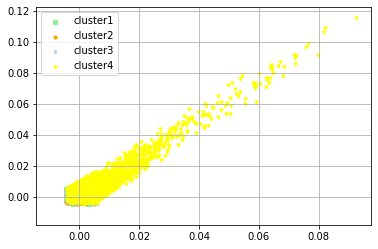

In [56]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [57]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 부정적

558

In [58]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 인플

600

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 이슈

643

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 거래소

2874

In [61]:
temp_cluster_result['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 2 # 부정적
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 6 #  인플
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 5 # 이슈
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 12 # 거래소

In [62]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [63]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [64]:
kmeans.inertia_

6.506479864043245

In [65]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[2 2 1 ... 0 0 0]


In [66]:
cluster_values= list(model.wv.vocab)

In [67]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-6.5064797


In [68]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [70]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.49716297


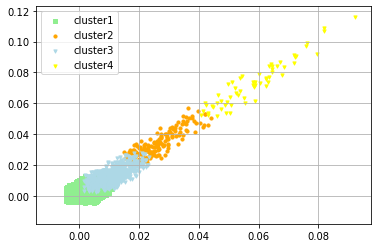

In [71]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [72]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [73]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [74]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [75]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [76]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [77]:
import scipy.spatial.distance as dist

In [78]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [79]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [80]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(30,'score') # 부정적

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1813,"[0.00046087405644357204, 0.005376779939979315,...",sparse,0,"[0.0016920082, 0.0021801963, -0.00052733644, -...",0.024223,0.002012,1.022211,NaN
2938,"[0.006189476698637009, 0.004477894864976406, -...",dominance,0,"[0.0016920082, 0.0021801963, -0.00052733644, -...",0.028443,0.006036,1.022407,NaN
3577,"[0.0037333862856030464, 0.003297448856756091, ...",empower,0,"[0.0016920082, 0.0021801963, -0.00052733644, -...",0.026600,0.004024,1.022576,NaN
1852,"[0.004574220161885023, 0.0029064128175377846, ...",correlate,0,"[0.0016920082, 0.0021801963, -0.00052733644, -...",0.025724,0.003018,1.022706,NaN
971,"[-0.0006086669745855033, 0.003454819554463029,...",overnight,0,"[0.0016920082, 0.0021801963, -0.00052733644, -...",0.027738,0.005030,1.022707,NaN
3897,"[-0.0027064320165663958, 0.00351732294075191, ...",someone,0,"[0.0016920082, 0.0021801963, -0.00052733644, -...",0.027086,0.004024,1.023062,NaN
520,"[0.005858658347278833, 0.001845948165282607, -...",engagement,0,"[0.0016920082, 0.0021801963, -0.00052733644, -...",0.026247,0.003018,1.023229,NaN
1129,"[-0.0018757699290290475, -0.002158488146960735...",flight,0,"[0.0016920082, 0.0021801963, -0.00052733644, -...",0.025255,0.002012,1.023243,NaN
2450,"[0.004372812807559967, 0.0010887372773140669, ...",loser,0,"[0.0016920082, 0.0021801963, -0.00052733644, -...",0.026362,0.003018,1.023343,NaN
1820,"[0.0014922706177458167, 0.004682638682425022, ...",veteran,0,"[0.0016920082, 0.0021801963, -0.00052733644, -...",0.025363,0.002012,1.023351,NaN


In [81]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 제도

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
215,"[0.03090699389576912, 0.038588590919971466, -0...",follow,1,"[0.026602484, 0.03433037, -0.008903122, -0.033...",0.029961,0.037224,0.992737,NaN
483,"[0.02608010172843933, 0.03522103652358055, -0....",file,1,"[0.026602484, 0.03433037, -0.008903122, -0.033...",0.030152,0.037224,0.992928,NaN
88,"[0.029728669673204422, 0.03371221572160721, -0...",view,1,"[0.026602484, 0.03433037, -0.008903122, -0.033...",0.030692,0.036218,0.994475,NaN
681,"[0.029543770477175713, 0.031200531870126724, -...",know,1,"[0.026602484, 0.03433037, -0.008903122, -0.033...",0.030824,0.036218,0.994606,NaN
442,"[0.023808104917407036, 0.036873895674943924, -...",legal,1,"[0.026602484, 0.03433037, -0.008903122, -0.033...",0.031661,0.036218,0.995443,NaN
1162,"[0.026699716225266457, 0.03662974014878273, -0...",solution,1,"[0.026602484, 0.03433037, -0.008903122, -0.033...",0.031164,0.035212,0.995953,NaN
212,"[0.027404548600316048, 0.03858666494488716, -0...",example,1,"[0.026602484, 0.03433037, -0.008903122, -0.033...",0.030608,0.034205,0.996403,NaN
306,"[0.02646993100643158, 0.033310048282146454, -0...",partner,1,"[0.026602484, 0.03433037, -0.008903122, -0.033...",0.027653,0.031187,0.996465,NaN
125,"[0.02602895349264145, 0.040473610162734985, -0...",write,1,"[0.026602484, 0.03433037, -0.008903122, -0.033...",0.034817,0.038230,0.996588,NaN
836,"[0.02525496669113636, 0.034479353576898575, -0...",china,1,"[0.026602484, 0.03433037, -0.008903122, -0.033...",0.028983,0.031187,0.997796,NaN


In [82]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(30,'score')  # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
86,"[0.01637491211295128, 0.012255268171429634, -0...",shutterstock,2,"[0.010860067, 0.01308092, -0.003463556, -0.013...",0.032289,0.022133,1.010156,NaN
961,"[0.007420368026942015, 0.009559374302625656, -...",reserve,2,"[0.010860067, 0.01308092, -0.003463556, -0.013...",0.027039,0.016097,1.010943,NaN
1836,"[0.009169251658022404, 0.010615507140755653, -...",organization,2,"[0.010860067, 0.01308092, -0.003463556, -0.013...",0.027059,0.015091,1.011969,NaN
1030,"[0.013099326752126217, 0.011494864709675312, -...",collateral,2,"[0.010860067, 0.01308092, -0.003463556, -0.013...",0.028119,0.016097,1.012022,NaN
773,"[0.008098919875919819, 0.016756922006607056, 0...",vaneck,2,"[0.010860067, 0.01308092, -0.003463556, -0.013...",0.032210,0.020121,1.012089,NaN
785,"[0.013318685814738274, 0.012103785760700703, -...",commission,2,"[0.010860067, 0.01308092, -0.003463556, -0.013...",0.025419,0.013079,1.012340,NaN
782,"[0.014017051085829735, 0.01717139221727848, -0...",federal,2,"[0.010860067, 0.01308092, -0.003463556, -0.013...",0.028645,0.016097,1.012549,NaN
0,"[0.01080481056123972, 0.015044286847114563, -0...",course,2,"[0.010860067, 0.01308092, -0.003463556, -0.013...",0.027647,0.015091,1.012557,NaN
1810,"[0.007837394252419472, 0.01606070250272751, 0....",social,2,"[0.010860067, 0.01308092, -0.003463556, -0.013...",0.028699,0.016097,1.012603,NaN
889,"[0.008937315084040165, 0.019176630303263664, -...",liquidity,2,"[0.010860067, 0.01308092, -0.003463556, -0.013...",0.032027,0.019115,1.012912,NaN


In [83]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
171,"[0.06463924795389175, 0.08033135533332825, -0....",asset,3,"[0.058329348, 0.07312274, -0.018271184, -0.072...",0.038500,0.150907,0.887594,NaN
42,"[0.0670669749379158, 0.08705204725265503, -0.0...",crypto,3,"[0.058329348, 0.07312274, -0.018271184, -0.072...",0.091139,0.180082,0.911057,NaN
261,"[0.058665722608566284, 0.07383763045072556, -0...",service,3,"[0.058329348, 0.07312274, -0.018271184, -0.072...",0.025357,0.089538,0.935819,NaN
621,"[0.06791698932647705, 0.07829705625772476, -0....",system,3,"[0.058329348, 0.07312274, -0.018271184, -0.072...",0.053546,0.106641,0.946906,NaN
302,"[0.05855090916156769, 0.07070255279541016, -0....",work,3,"[0.058329348, 0.07312274, -0.018271184, -0.072...",0.032963,0.085514,0.947449,NaN
398,"[0.07216811180114746, 0.0896698459982872, -0.0...",blockchain,3,"[0.058329348, 0.07312274, -0.018271184, -0.072...",0.135856,0.187124,0.948732,NaN
414,"[0.06418883055448532, 0.08513224869966507, -0....",financial,3,"[0.058329348, 0.07312274, -0.018271184, -0.072...",0.091933,0.141852,0.950081,NaN
273,"[0.06364111602306366, 0.08390769362449646, -0....",make,3,"[0.058329348, 0.07312274, -0.018271184, -0.072...",0.079928,0.128774,0.951155,NaN
423,"[0.06245913356542587, 0.07660935074090958, -0....",platform,3,"[0.058329348, 0.07312274, -0.018271184, -0.072...",0.052182,0.099598,0.952584,NaN
117,"[0.06238012760877609, 0.07094863802194595, -0....",data,3,"[0.058329348, 0.07312274, -0.018271184, -0.072...",0.033247,0.079477,0.953769,NaN


In [88]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #부정

3885

In [89]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #제도

159

In [90]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #비즈

570

In [91]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #투자

61

In [92]:
temp_cluster_result1['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 2 # 부정
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 10 # 제도
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 7 # 비즈
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 11 # 투자

In [93]:
temp_cluster_result1['result'] = 2 # 1 상승 2 하락 3 보합
temp_cluster_result['result'] = 2
temp_cluster_result1['Silhouette'] = 0.49716297
temp_cluster_result['Silhouette'] = 0.49716297

In [94]:
temp_cluster_result1.to_csv("../cluster/en_news/2019_down3/en_news_2019_down3_euclidean.csv")
temp_cluster_result.to_csv("../cluster/en_news/2019_down3/en_news_2019_down3_cosine.csv")

In [86]:
word_vectors = model.wv

In [87]:
vocabs = word_vectors.vocab.keys()

In [88]:
word_vector_list = [word_vectors[v]for v in vocabs]

In [89]:
print(word_vectors.similarity(w1='little',w2='push'))

0.8299645


In [90]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vector_list)

In [91]:
xys

array([[ 0.0565084 , -0.00025983],
       [ 0.02674065, -0.00363325],
       [ 0.13448007,  0.00103502],
       ...,
       [-0.02979163, -0.00173899],
       [-0.02879602,  0.0081799 ],
       [-0.02803128,  0.00344337]])

In [92]:
xys[:,0]

array([ 0.0565084 ,  0.02674065,  0.13448007, ..., -0.02979163,
       -0.02879602, -0.02803128])

In [93]:
xys[:,1]

array([-0.00025983, -0.00363325,  0.00103502, ..., -0.00173899,
        0.0081799 ,  0.00344337])

In [94]:
xs = xys[:,0]
ys = xys[:,1]

In [95]:
def plot_2d_graph(vocabs,xs,ys) :
    plt.figure(figsize=(8,6))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs) :
        plt.annotate(v,xy=(xs[i],ys[i]))

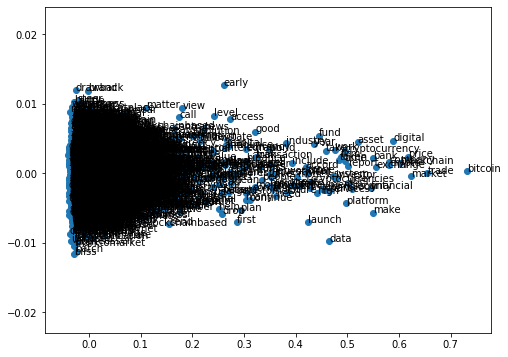

In [96]:
plot_2d_graph(vocabs,xs,ys)

In [97]:
nltk.help.upenn_tagset

<function nltk.help.upenn_tagset(tagpattern=None)>